In [120]:
install.packages("tidyverse")
install.packages("reshape2")
install.packages("plotly")


The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpRttFd1/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpRttFd1/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpRttFd1/downloaded_packages


In [121]:
library(tidyverse)
library(reshape2)
library(plotly)

In [122]:
Mdata = "data/USMeasles.csv"
mdata <- read.csv(Mdata, header=TRUE)
#turn mdata into a dataframe
head(mdata)

,Admin1Name,Admin1ISO,Admin2Name,CityName,PeriodStartDate,PeriodEndDate,PlaceOfAcquisition,CountValue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,WISCONSIN,US-WI,NA,NA,1927-11-20,1927-11-26,NA,85
2,WISCONSIN,US-WI,NA,NA,1927-11-27,1927-12-03,NA,120
3,WISCONSIN,US-WI,NA,NA,1927-12-04,1927-12-10,NA,84
4,WISCONSIN,US-WI,NA,NA,1927-12-18,1927-12-24,NA,106
5,WISCONSIN,US-WI,NA,NA,1927-12-25,1927-12-31,NA,39
6,WISCONSIN,US-WI,NA,NA,1928-01-01,1928-01-07,NA,45


In [123]:
#put the 1st, 2nd, 5th, 6th and 8th column into data
data = mdata[c(1,5,6,8)]
head(data)
#remove the na from the data 

,Admin1Name,PeriodStartDate,PeriodEndDate,CountValue
,<chr>,<chr>,<chr>,<int>
1,WISCONSIN,1927-11-20,1927-11-26,85
2,WISCONSIN,1927-11-27,1927-12-03,120
3,WISCONSIN,1927-12-04,1927-12-10,84
4,WISCONSIN,1927-12-18,1927-12-24,106
5,WISCONSIN,1927-12-25,1927-12-31,39
6,WISCONSIN,1928-01-01,1928-01-07,45


In [124]:
#data only keep the rows where PerioudStart date is > "1950-01-01"
dataDate <- data[data[,2] > "1980-01-01",]
#only keep the rows where Countvalue is < 1000
dataDate <- dataDate[dataDate[,4] > 100,]
head(dataDate)

,Admin1Name,PeriodStartDate,PeriodEndDate,CountValue
,<chr>,<chr>,<chr>,<int>
2620,WISCONSIN,1980-05-04,1980-05-10,104
2623,WISCONSIN,1980-05-25,1980-05-31,105
2624,WISCONSIN,1980-06-01,1980-06-07,127
5217,OHIO,1989-04-16,1989-04-22,104
5225,OHIO,1989-09-03,1989-09-09,103
5227,OHIO,1989-09-17,1989-09-23,119


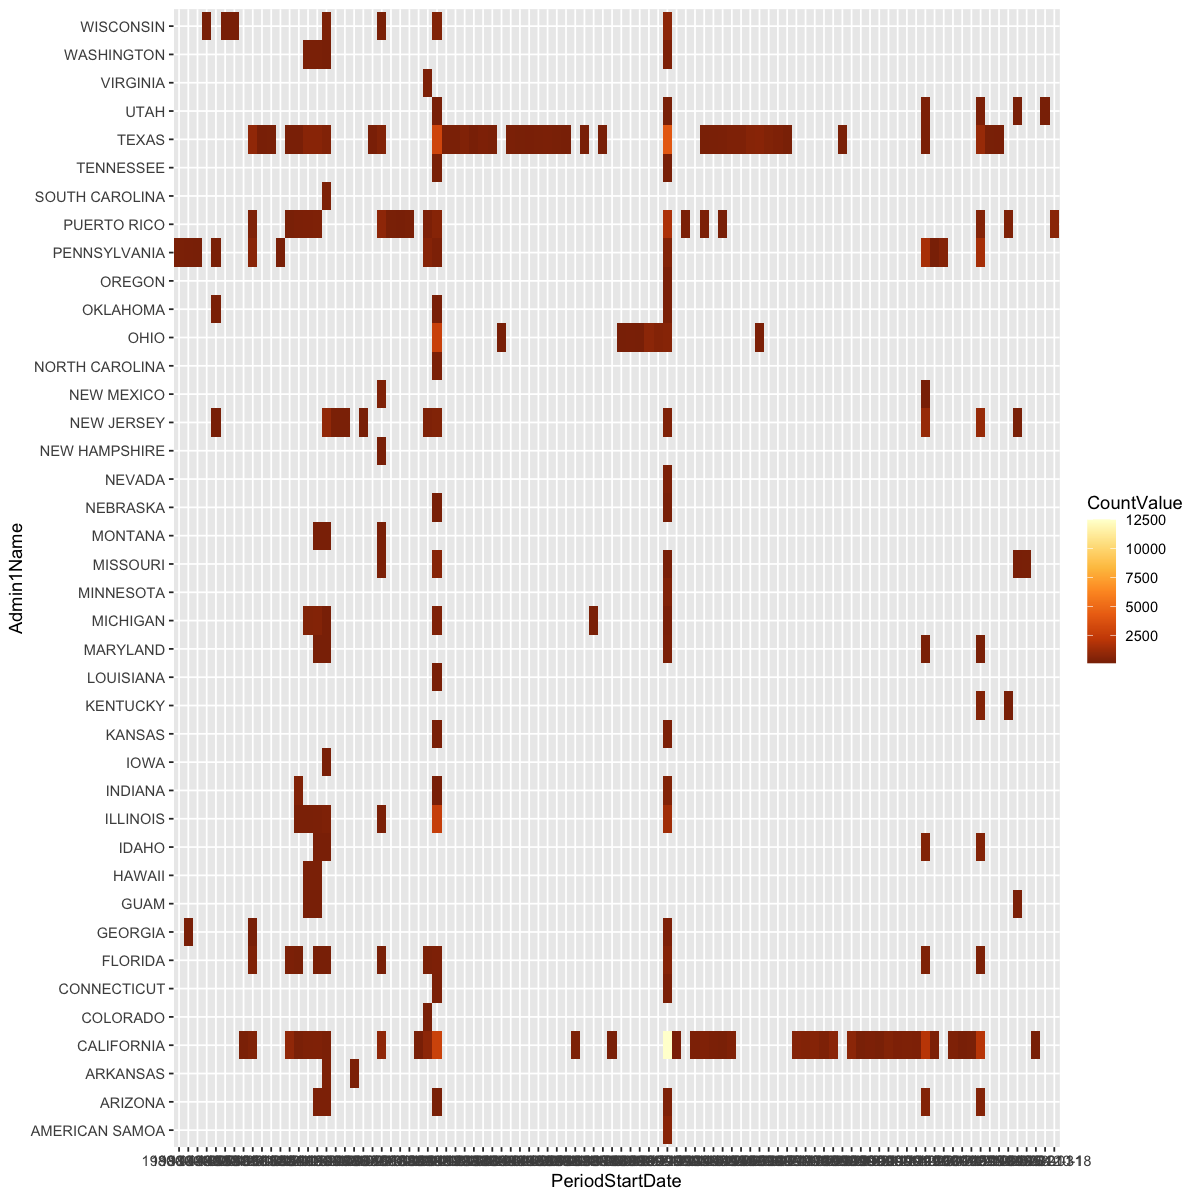

In [125]:
ggplot(dataDate, aes(x = PeriodStartDate, y = Admin1Name, fill = CountValue)) +
  #scale_fill_gradientn(colours = c("blue", "red")) +
  scale_fill_distiller(palette = "YlOrBr") +
  #scale_fill_distiller(palette = "Viridis") +
  geom_tile()

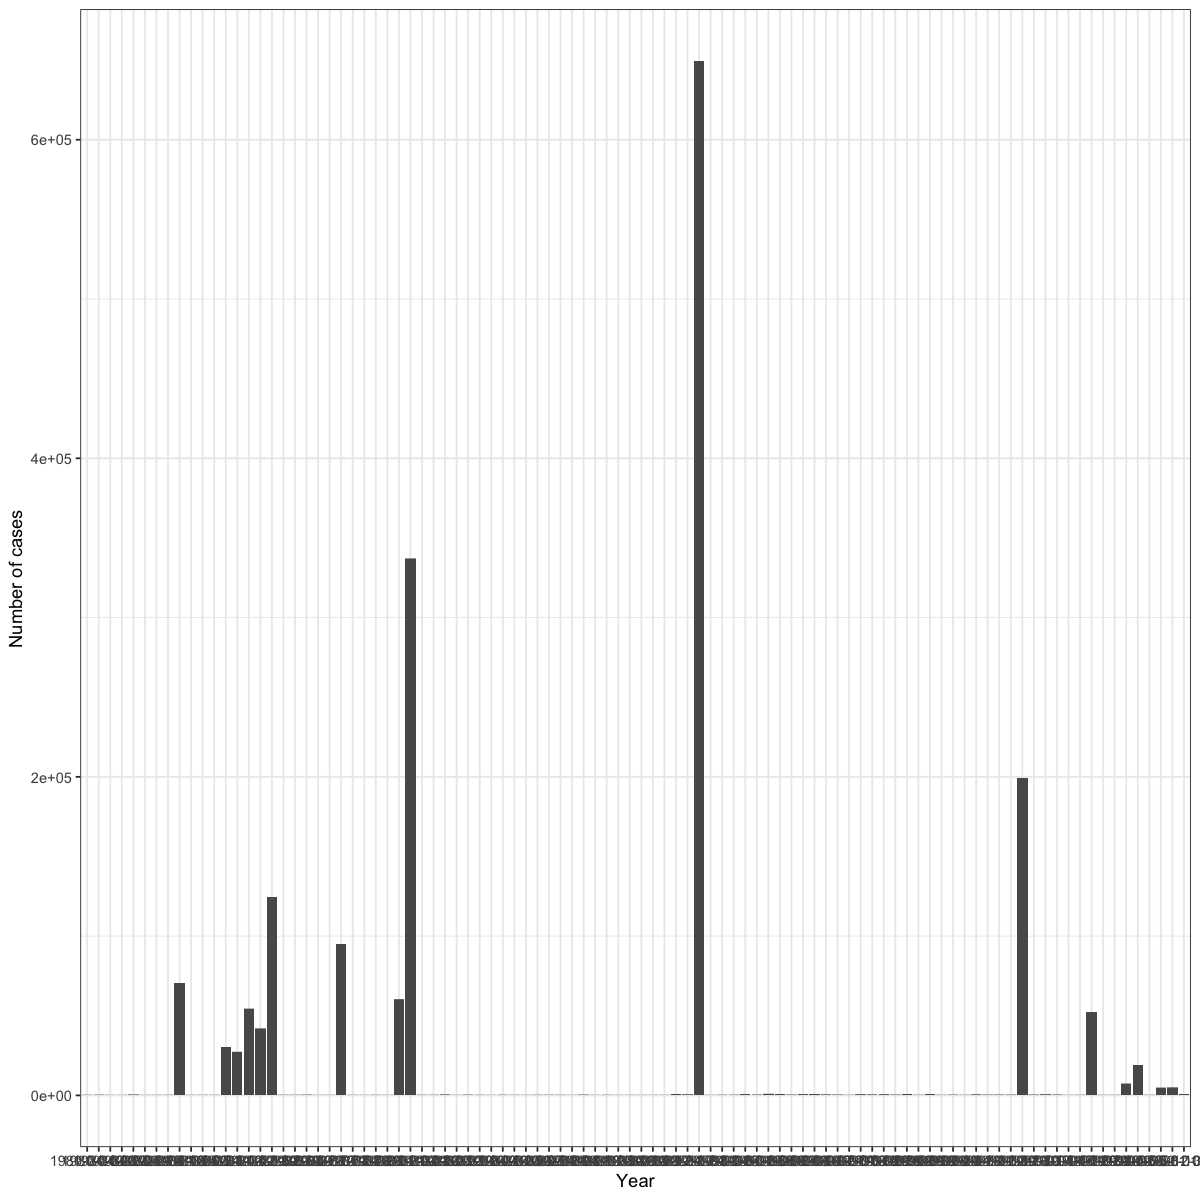

In [126]:
#create a bar chart of the data
ggplot(dataDate, aes(x = PeriodStartDate, y = CountValue)) +
  geom_bar(stat = "identity") +
  labs(x = "Year", y = "Number of cases") +
  theme_bw()


In [127]:
#install.packages("scico")
library(scico)

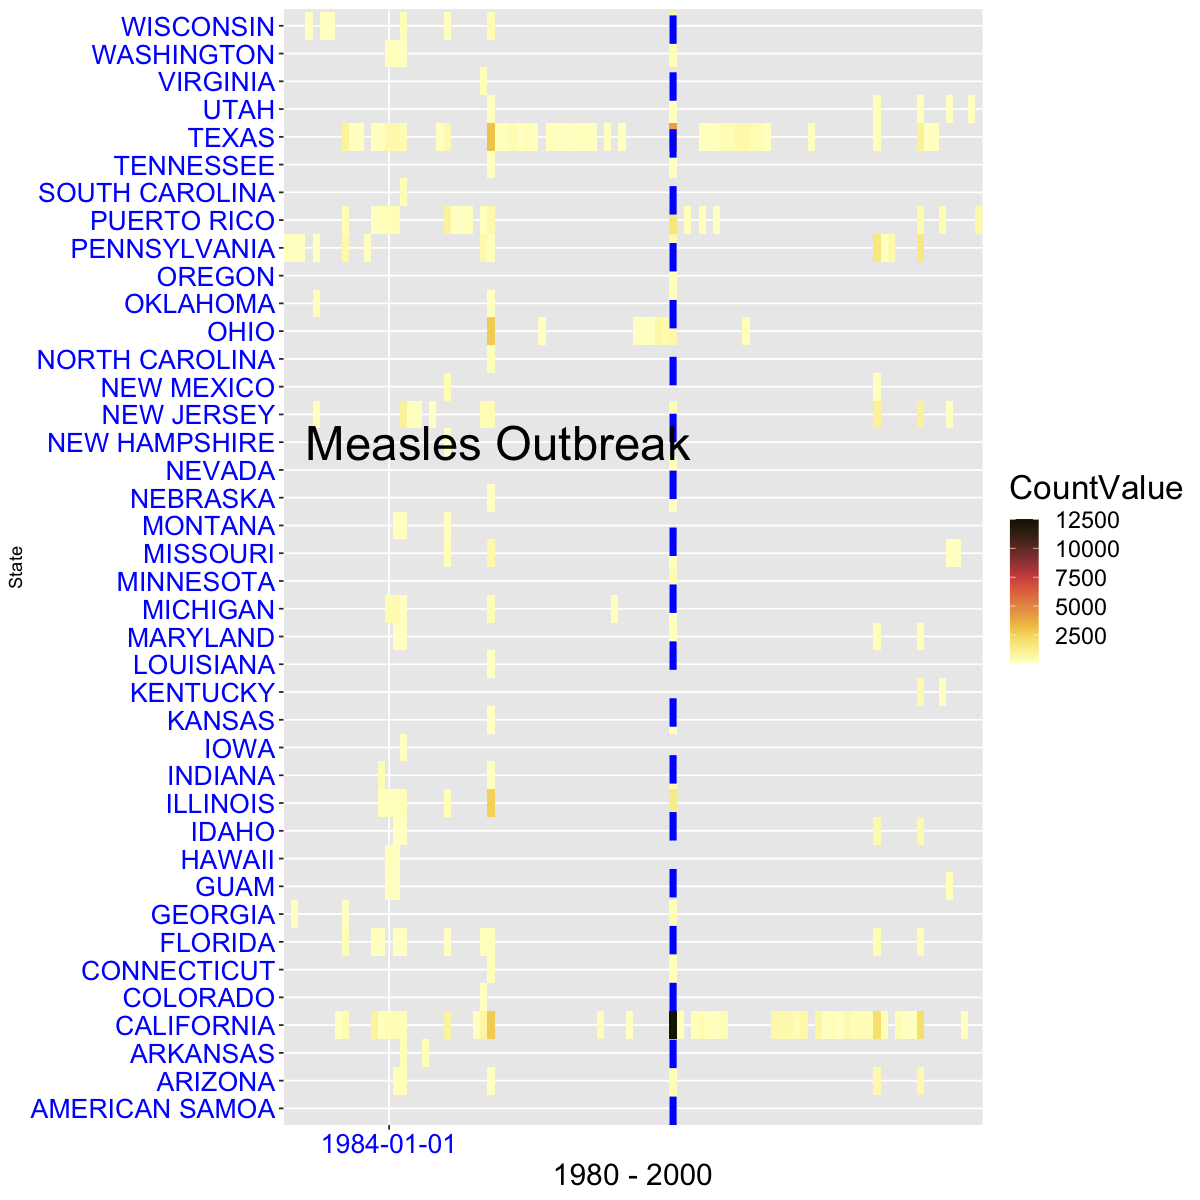

In [140]:
options(repr.plot.height=10,repr.plot.width=10)

ggplot(dataDate, aes(x = PeriodStartDate, y = Admin1Name, fill = CountValue)) +
labs(x="1980 - 2000", y="State")+
scale_x_discrete(expand=c(0, 0),
                    breaks=c( "1984-01-01", "1985-02-24", "1986-01-01"))+
#  scale_fill_distiller(palette = "YlGnBu") +
 scico::scale_fill_scico(palette = "lajolla") +
  geom_tile() + geom_vline(xintercept = 54, linetype="dashed", 
                color = "blue", size=2) +
 annotate("text", x = 30, y = 25, size = 10,label = "Measles Outbreak") + 
theme(
    axis.title.x=element_text(size=18),
    axis.text=element_text(size=16, colour='blue'),
    legend.text=element_text(size=14),
    legend.title=element_text(size=20)
)